# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

This dataset bridges data from Stack Overflow with broader socio-economic indicators at the regional level within European countries. It integrates information on Stack Overflow activity (questions, answers, comments and votes) for each region, combined with economic performance indicators (GDP and GVA) and demographic data (employment rates and total population).

This is a list of the columns in our final dataset and the corresponding description:

| Column                      | Description                                               |
|-----------------------------|-----------------------------------------------------------|
| **nuts3_code**              | NUTS 3 region code                                        |
| **year**             | Time period for the data                                  |
| **EMP (THS)**               | Employment in thousands for the region                    |
| **GDP (EUR_HAB)**           | GDP per inhabitant in euros                               |
| **GDP (EUR_HAB_EU27_2020)** | GDP per inhabitant in euros (indexed to EU27_2020)        |
| **GDP (MIO_EUR)**           | GDP in million euros                                      |
| **GDP (MIO_NAC)**           | GDP in million units of national currency                 |
| **GDP (MIO_PPS_EU27_2020)** | GDP in million Purchasing Power Standards (EU27_2020)     |
| **GDP (PPS_EU27_2020_HAB)** | GDP per inhabitant in PPS (EU27_2020)                     |
| **GDP (PPS_HAB_EU27_2020)** | GDP per inhabitant in PPS (indexed to EU27_2020)          |
| **GVA (MIO_EUR)**           | Gross Value Added in million euros                        |
| **GVA (MIO_NAC)**           | Gross Value Added in million units of national currency   |
| **POP (THS)**               | Population in thousands                                   |
| **nuts3_name**              | Name of the NUTS 3 region                                 |
| **country**                 | Country the NUTS 3 region belongs to                      |
| **questioncount**           | Number of questions posted from the region on StackOverflow|
| **answercount**             | Number of answers provided from the region on StackOverflow|
| **upvotecount**             | Number of upvotes received for the region on StackOverflow |
| **downvotecount**           | Number of downvotes received for the region on StackOverflow|
| **commentcount**            | Number of comments made from the region on StackOverflow  |


In [17]:
# Read the final datset
final_df = pd.read_excel(r"FINAL_updated.xlsx")

final_df.head(10)

,year,nuts3_name,country,questioncount,answercount,upvotecount,downvotecount,commentcount,nuts3_code,EMP (THS),GDP (MIO_EUR),GVA (MIO_EUR),POP (THS)
0,2008,Aargau,CH,86,167,0,0,32,CH033,349.067,24942.455371,23931.324019,586.60
1,2009,Aargau,CH,370,2291,4158,265,3282,CH033,349.067,25582.147076,24614.963819,595.84
2,2010,Aargau,CH,1658,4073,12602,474,7459,CH033,349.067,28422.113810,27311.621095,604.17
3,2011,Aargau,CH,1876,6039,16410,2362,13563,CH033,348.695,32557.042431,31336.257699,614.88
4,2012,Aargau,CH,3226,6260,24401,4175,18513,CH033,355.344,33443.246005,32261.320850,622.82
5,2013,Aargau,CH,3631,6024,25739,2538,15032,CH033,363.564,33495.138882,32313.446917,631.85
6,2014,Aargau,CH,3561,5326,25630,4342,15977,CH033,369.473,34461.588893,33329.515989,640.82
7,2015,Aargau,CH,3484,6403,27982,2654,15784,CH033,373.499,38959.114425,37719.292703,649.48
8,2016,Aargau,CH,4014,4080,30642,2635,13645,CH033,377.885,38645.852889,37498.105439,658.57
9,2017,Aargau,CH,3498,4287,25214,2271,14484,CH033,380.843,38469.186721,37309.396428,667.23


In [3]:
# Show the types of the columns
final_df.dtypes

year               int64
nuts3_name        object
country           object
questioncount      int64
answercount        int64
upvotecount        int64
downvotecount      int64
commentcount       int64
nuts3_code        object
EMP (THS)        float64
GDP (MIO_EUR)    float64
GVA (MIO_EUR)    float64
POP (THS)        float64
dtype: object

In [4]:
# Summary statistics for numerical columns
final_df.describe().round(2)

,year,questioncount,answercount,upvotecount,downvotecount,commentcount,EMP (THS),GDP (MIO_EUR),GVA (MIO_EUR),POP (THS)
count,5005.00,5005.00,5005.00,5005.00,5005.00,5005.00,5005.00,5005.00,5005.00,5005.00
mean,2014.00,1319.95,1758.71,7635.92,901.51,5476.59,272.25,16905.80,15281.60,687.47
std,3.74,4287.46,5573.85,27392.64,3627.13,18058.27,398.62,27607.67,24927.64,1004.79
min,2008.00,0.00,0.00,0.00,0.00,0.00,8.42,288.66,257.65,15.51
25%,2011.00,66.00,72.00,203.00,8.00,184.00,94.60,4292.68,3843.10,251.59
50%,2014.00,271.00,314.00,1145.00,69.00,893.00,158.00,9091.34,8204.32,412.20
75%,2017.00,982.00,1239.00,4929.00,418.00,3888.00,291.80,18002.93,16447.10,788.98
max,2020.00,70818.00,92307.00,531337.00,85568.00,335536.00,5300.51,246936.50,219566.70,15490.92


**Plotting the variables over the years per country:**

In [5]:
# Group by year and country
by_year_country =final_df.groupby(['year','country']).sum(min_count=1).reset_index()

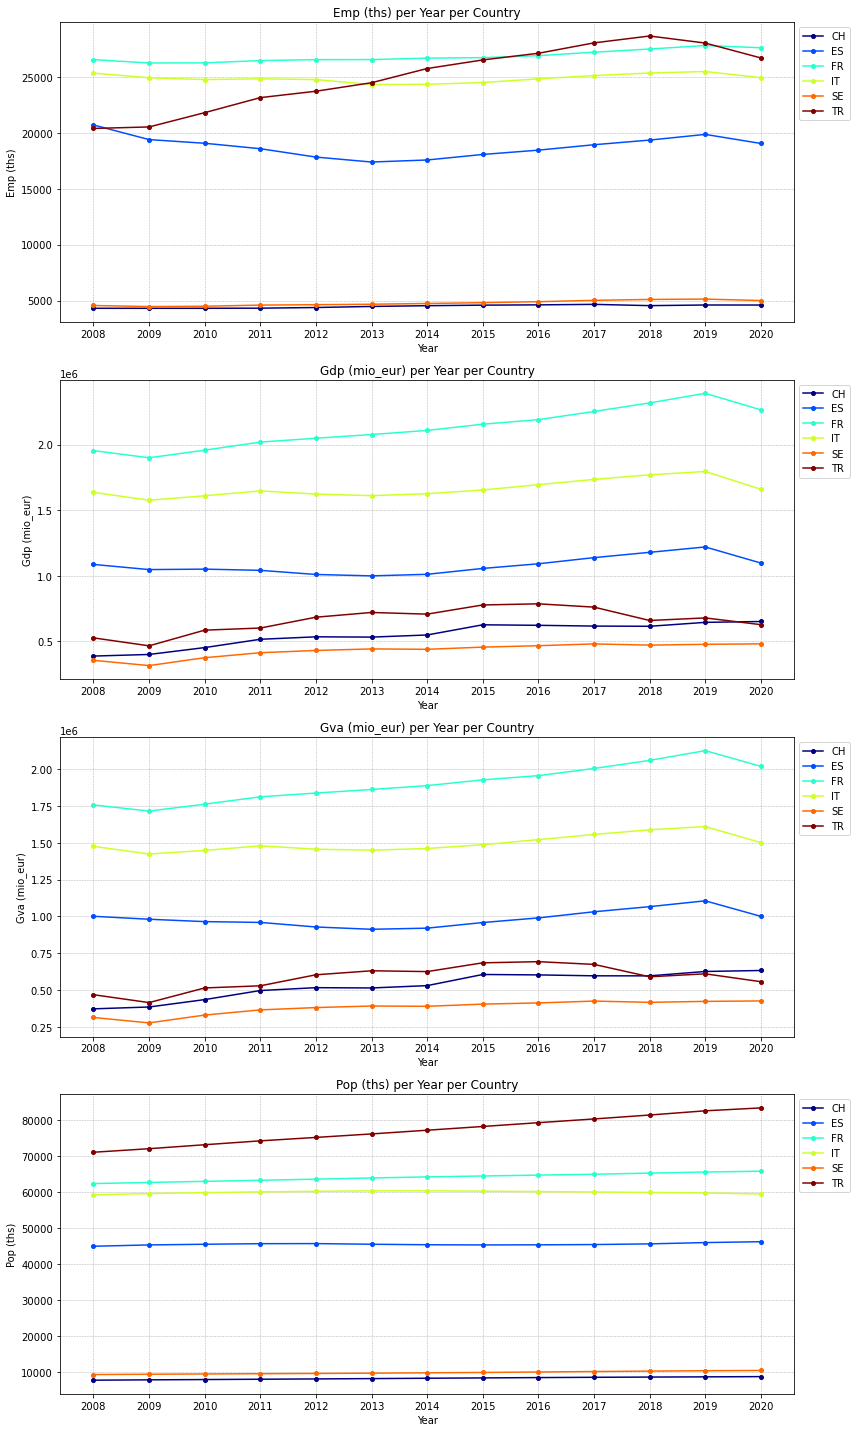

In [16]:
# List of indicators
indicators = [
    'EMP (THS)',
    'GDP (MIO_EUR)',
    'GVA (MIO_EUR)',
    'POP (THS)'
]

# Create a list of unique countries for colors
countries = by_year_country['country'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(countries)))  # Get a colormap

# Set up a subplot grid that has 4 rows and 1 column
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 20))

# Plotting each country's time series for questioncount, answercount, and upvotecount
for idx, metric in enumerate(indicators):
    for i, country in enumerate(countries):
        country_data = by_year_country[by_year_country['country'] == country].sort_values('year')
        axes[idx].plot(country_data['year'], country_data[metric], label=country, color=colors[i], marker='o', markersize=4)

    # Set labels and title for each subplot
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylabel(metric.capitalize())
    axes[idx].set_title(f'{metric.capitalize()} per Year per Country')
    axes[idx].grid(True, which='both', linestyle='--', linewidth=0.5)
    axes[idx].set_xticks(by_year_country['year'].unique())  # Only show integer years on the x-axis
    axes[idx].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

**PLotting the Top 10 regions by Stack Overflow activity:**

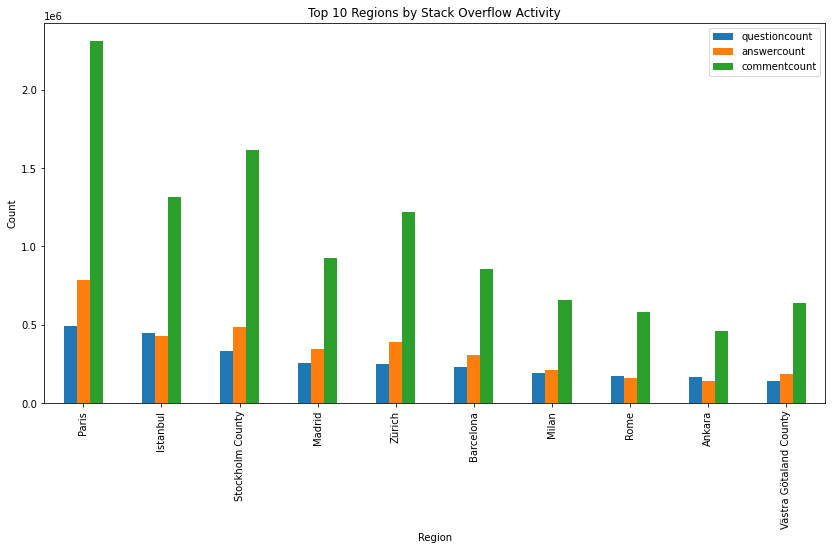

In [9]:
# Top 10 regions by SO activity
region_activity = final_df.groupby('nuts3_name')[['questioncount', 'answercount', 'commentcount']].sum()
region_activity = region_activity.sort_values('questioncount', ascending=False).head(10)
region_activity.plot(kind='bar', figsize=(14, 7))
plt.title('Top 10 Regions by Stack Overflow Activity')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


**Yearly growth in Stack Overflow activity:**

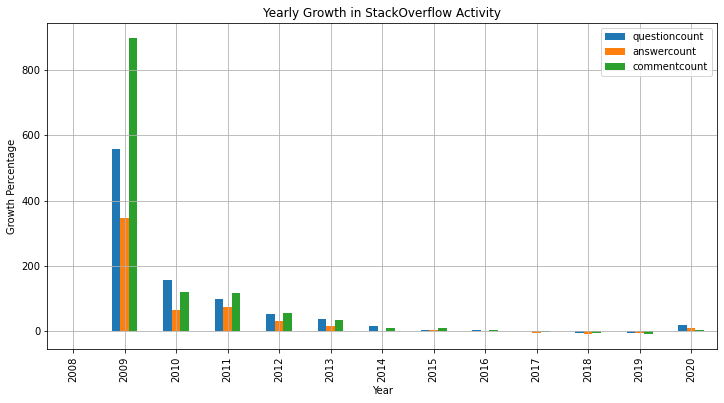

In [10]:
# Calculate yearly growth in activity
yearly_growth = final_df.groupby('year')[['questioncount', 'answercount', 'commentcount']].sum().pct_change() * 100

# Plot
yearly_growth.plot(kind='bar', figsize=(12, 6))
plt.title('Yearly Growth in StackOverflow Activity')
plt.xlabel('Year')
plt.ylabel('Growth Percentage')
plt.grid(True)
plt.show()

## Analyzing the relation between programming literacy and economic resilience

We can start to analyze the relation between programming literacy and economic resilience with a very simple hypothesis:

*The top 10 regions by Stack Overflow activity in terms of question count and the top 10 regions by GDP (MIO_EUR) should be similar.*

In order to test this hypothesis we can plot the relevant data.

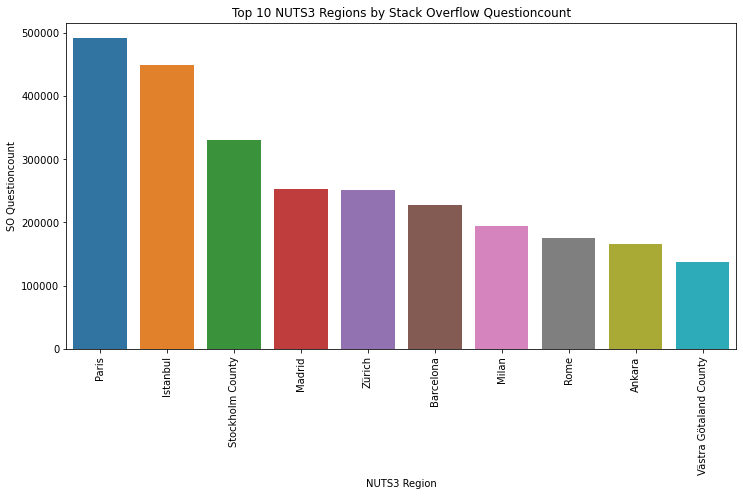

In [11]:
# Top N regions by questioncount
top_N = 10
top_regions = final_df.groupby('nuts3_name')['questioncount'].sum().sort_values(ascending=False).head(top_N)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_regions.index, y=top_regions.values)
plt.title('Top {} NUTS3 Regions by Stack Overflow Questioncount'.format(top_N))
plt.xlabel('NUTS3 Region')
plt.ylabel('SO Questioncount')
plt.xticks(rotation=90)
plt.show()

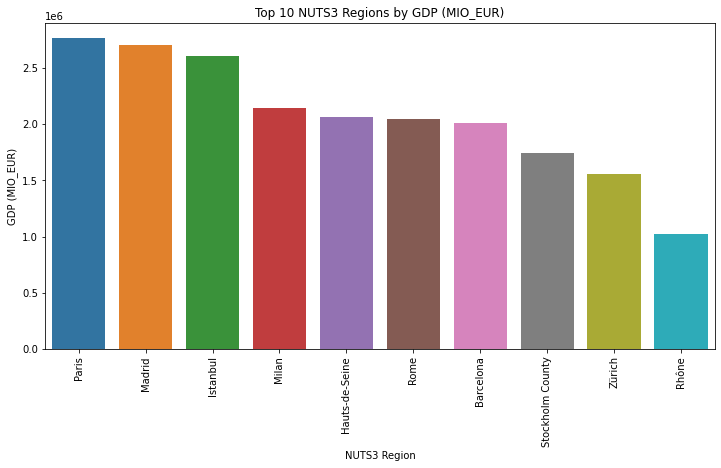

In [12]:
# Top N regions by GDP
top_N = 10
top_regions = final_df.groupby('nuts3_name')['GDP (MIO_EUR)'].sum().sort_values(ascending=False).head(top_N)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_regions.index, y=top_regions.values)
plt.title('Top {} NUTS3 Regions by GDP (MIO_EUR)'.format(top_N))
plt.xlabel('NUTS3 Region')
plt.ylabel('GDP (MIO_EUR)')
plt.xticks(rotation=90)
plt.show()

We can see that 8 out of the Top 10 NUTS3 regions in terms of Stack Overflow question count and GDP are the same. 

This suggests that our simple hypothesis to some degree can be regarded as true.

**Correlation Matrix:**

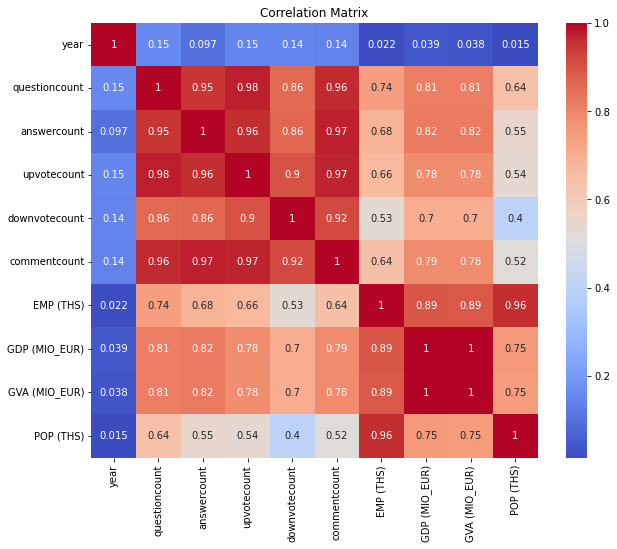

In [13]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = final_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Plotting question count against GDP:**

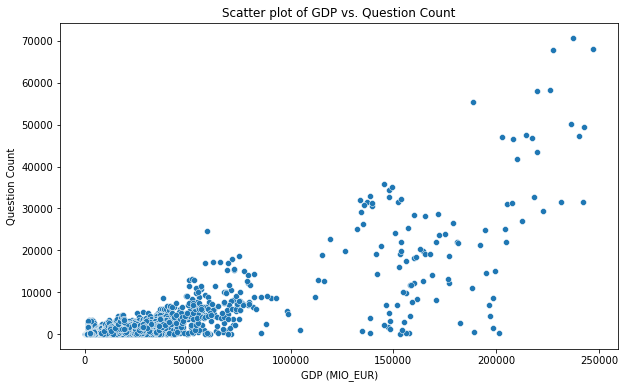

In [14]:
# Scatter plot of GDO vs. questioncount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP (MIO_EUR)', y='questioncount', data=final_df)
plt.title('Scatter plot of GDP vs. Question Count')
plt.xlabel('GDP (MIO_EUR)')
plt.ylabel('Question Count')
plt.show()

                             OLS Regression Results                            
Dep. Variable:     Economic_Resilience   R-squared:                       0.820
Model:                             OLS   Adj. R-squared:                  0.820
Method:                  Least Squares   F-statistic:                     1199.
Date:                 Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                         14:16:39   Log-Likelihood:                -53983.
No. Observations:                 5005   AIC:                         1.080e+05
Df Residuals:                     4985   BIC:                         1.081e+05
Df Model:                           19                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.195e+04   

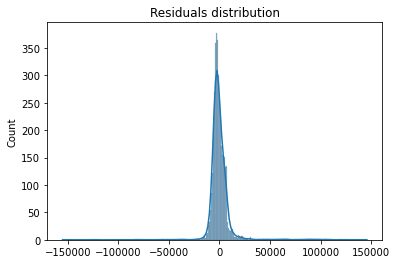

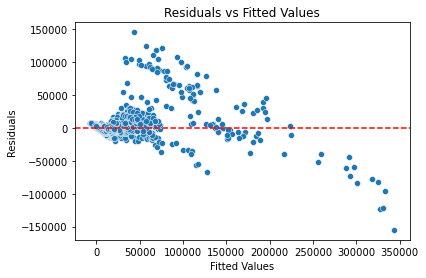

{'Lagrange Multiplier statistic': 1320.6888076594746, 'p-value': 1.297547971799461e-268, 'f-value': 94.04934031844743, 'f p-value': 1.84605356237e-313}


In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load your dataset (assuming a CSV file)
data = final_df

# Create a Programming Literacy Index (PLI) - This is a simplistic approach
# and should be refined based on your literature review and hypothesis
data['PLI'] = (data['questioncount'] + data['answercount'] + 
               data['upvotecount'] - data['downvotecount'] + 
               data['commentcount'])

# Choose an economic resilience indicator (e.g., GDP)
# This also could be a composite index if needed
data['Economic_Resilience'] = data['GDP (MIO_EUR)'] 

# For regression analysis, you might want to control for population
data['Population'] = data['POP (THS)']

# Constructing the regression model
# Assuming you're controlling for population, country, and using year as a fixed effect:
model = smf.ols('Economic_Resilience ~ PLI + Population + C(country) + C(year)', data=data).fit()

# View the regression results
print(model.summary())

# Diagnostic checks (for brevity, only showing homoscedasticity check)
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the residuals
residuals = model.resid
fig, ax = plt.subplots()
sns.histplot(residuals, kde=True, ax=ax)
ax.set_title('Residuals distribution')
plt.show()

# Homoscedasticity check
fig, ax = plt.subplots()
sns.scatterplot(x=model.fittedvalues, y=residuals, ax=ax)
ax.set_title('Residuals vs Fitted Values')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Breusch-Pagan test for heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, model.model.exog)
labels = ['Lagrange Multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))